In [34]:
# Importing Libraries(Technologies)
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
from datetime import date
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#import sweetviz
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [ ]:
!pip install sweetviz

In [70]:
df=pd.read_csv('https://github.com/ajtheb/predict-gift-price-hackerearth/blob/master/dataset/train.csv?raw=true')
dftest=pd.read_csv('https://github.com/ajtheb/predict-gift-price-hackerearth/blob/master/dataset/test.csv?raw=true')

In [36]:
my_report = sweetviz.analyze([df, "Train"],target_feat='price')
my_report.show_html('Report.html')

NameError: ignored

In [ ]:
df.shape

(20279, 17)

In [ ]:
df.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [ ]:
df.describe()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price
count,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,7323.000000,20279.000000
mean,739.554662,394.171557,3303.358548,5314.595345,4187.653928,4866.945510,1679.152226,8.652695,1265.898171,0.229646,15.515363,143.404411
std,389.216989,235.077769,2541.082549,2703.317282,2274.875522,2713.856392,485.699119,2.349388,697.838495,0.420616,7.579669,267.281159
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.010000
25%,403.000000,188.000000,587.000000,3311.000000,2251.000000,2548.000000,1801.000000,9.000000,577.500000,0.000000,9.000000,45.645000
50%,825.000000,433.000000,3231.000000,5520.000000,4246.000000,4839.000000,1912.000000,9.000000,1616.000000,0.000000,13.000000,75.600000
75%,1032.000000,534.000000,5787.000000,7535.000000,6504.500000,7387.000000,1912.000000,10.000000,1899.000000,0.000000,24.000000,126.845000
max,1360.000000,893.000000,7567.000000,9979.000000,7604.000000,9493.000000,2056.000000,10.000000,2065.000000,1.000000,29.000000,7010.270000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20279 entries, 0 to 20278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_id            20279 non-null  object 
 1   gift_type          20279 non-null  int64  
 2   gift_category      20279 non-null  int64  
 3   gift_cluster       20279 non-null  int64  
 4   instock_date       20279 non-null  object 
 5   stock_update_date  20279 non-null  object 
 6   lsg_1              20279 non-null  int64  
 7   lsg_2              20279 non-null  int64  
 8   lsg_3              20279 non-null  int64  
 9   lsg_4              20279 non-null  int64  
 10  lsg_5              20279 non-null  int64  
 11  lsg_6              20279 non-null  int64  
 12  uk_date1           20279 non-null  object 
 13  uk_date2           20279 non-null  object 
 14  is_discounted      20279 non-null  int64  
 15  volumes            7323 non-null   float64
 16  price              202

In [ ]:
df.isnull().sum()

gift_id                  0
gift_type                0
gift_category            0
gift_cluster             0
instock_date             0
stock_update_date        0
lsg_1                    0
lsg_2                    0
lsg_3                    0
lsg_4                    0
lsg_5                    0
lsg_6                    0
uk_date1                 0
uk_date2                 0
is_discounted            0
volumes              12956
price                    0
dtype: int64

In [69]:
dftest.isnull().sum()

gift_id                 0
gift_type               0
gift_category           0
gift_cluster            0
instock_date            0
stock_update_date       0
lsg_1                   0
lsg_2                   0
lsg_3                   0
lsg_4                   0
lsg_5                   0
lsg_6                   0
uk_date1                0
uk_date2                0
is_discounted           0
volumes              2352
dtype: int64

In [ ]:
12956/20279*100 #<80

63.88875191084373

In [71]:
df['volumes']=df['volumes'].fillna(df['volumes'].median())
dftest['volumes']=dftest['volumes'].fillna(dftest['volumes'].median())

In [4]:
df.isnull().sum()

gift_id              0
gift_type            0
gift_category        0
gift_cluster         0
instock_date         0
stock_update_date    0
lsg_1                0
lsg_2                0
lsg_3                0
lsg_4                0
lsg_5                0
lsg_6                0
uk_date1             0
uk_date2             0
is_discounted        0
volumes              0
price                0
dtype: int64

In [5]:
df.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'volumes', 'price'],
      dtype='object')

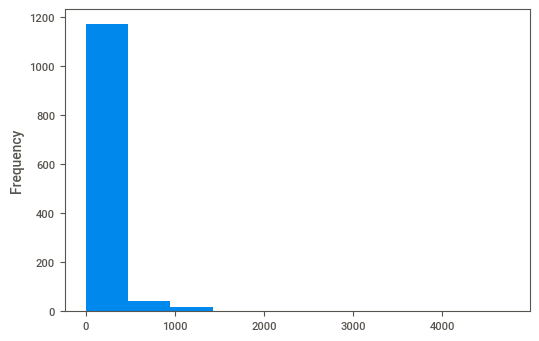

In [ ]:
df.groupby('gift_type')['price'].mean().plot(kind='hist')

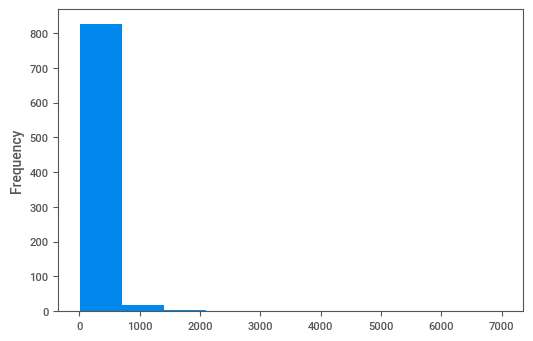

In [ ]:
df.groupby('gift_category')['price'].mean().plot(kind='hist')

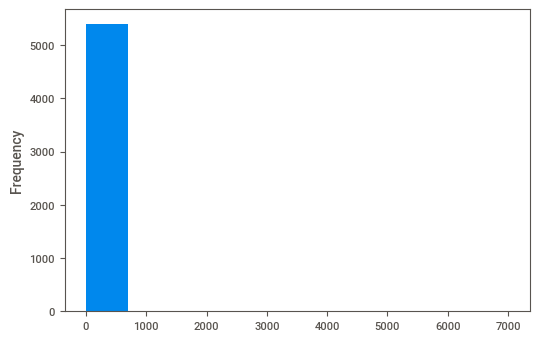

In [ ]:
df.groupby('gift_cluster')['price'].mean().plot(kind='hist')

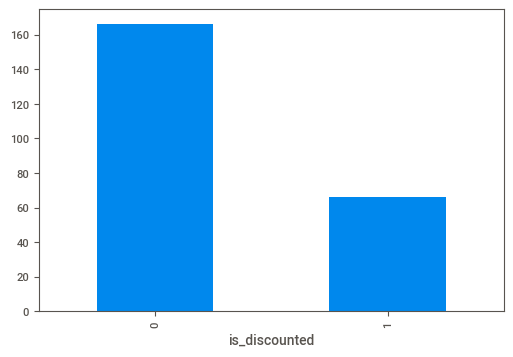

In [ ]:
df.groupby('is_discounted')['price'].mean().plot(kind='bar')

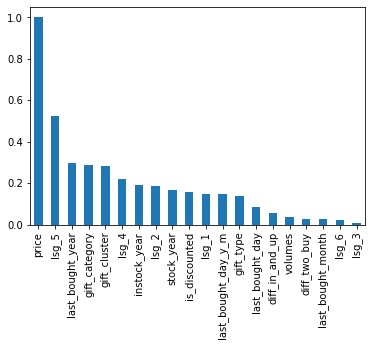

In [105]:
pearsoncorr = df.corr(method='pearson')
abs(pearsoncorr['price']).sort_values(ascending=False).plot(kind='bar')

In [ ]:
df.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price,stock_day,stock_month,stock_year,last_bought,last_bought_day,last_bought_month,last_bought_year,instock_day,instock_month,instock_year,last_bought_day_y_m,stock_day_m_y,instock_day_m_y,diff_two_buy
0,GF_11156,61,534,3942,2014-02-21 05:07:06,2016-11-09 15:49:51,3377,5221,504,1912,10,554,2014-02-24 08:07:06,2014-02-24 07:07:06,0,13.0,175.54,9,11,2016,2014-02-24 08:07:06,24,2,2014,21,2,2014,96672,199584,84588,0.041667
1,GF_11157,61,534,3942,2014-02-21 06:07:06,2016-11-11 13:49:51,3377,5221,504,1912,10,554,2014-02-22 07:07:06,2014-02-24 06:07:06,1,13.0,95.80,11,11,2016,2014-02-24 06:07:06,24,2,2014,21,2,2014,96672,243936,84588,1.958333
2,GF_15689,584,262,0,2014-02-21 09:30:21,2016-03-24 14:46:18,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45,2016-03-18 02:00:00,1,13.0,107.35,24,3,2016,2016-03-18 02:00:00,18,3,2016,21,2,2014,108864,145152,84588,52.080035
3,GF_11155,61,534,3942,2014-02-22 05:07:06,2016-11-10 16:49:51,3377,5221,504,1912,10,554,2016-11-07 13:49:51,2016-11-06 04:00:00,0,13.0,172.90,10,11,2016,2016-11-07 13:49:51,7,11,2016,22,2,2014,155232,221760,88616,1.409618
4,GF_11158,61,534,3942,2014-02-22 07:07:06,2016-11-10 13:49:51,3377,5221,504,1912,9,554,2016-11-07 15:49:51,2016-11-06 01:00:00,1,13.0,77.72,10,11,2016,2016-11-07 15:49:51,7,11,2016,22,2,2014,155232,221760,88616,1.617951


In [72]:
df['instock_date']=pd.to_datetime(df['instock_date'])
dftest['instock_date']=pd.to_datetime(dftest['instock_date'])

In [73]:
df['stock_update_date']=pd.to_datetime(df['stock_update_date'],format='%Y-%m-%d')
df['uk_date1']=pd.to_datetime(df['uk_date1'],format='%Y-%m-%d ')
df['uk_date2']=pd.to_datetime(df['uk_date2'],format='%Y-%m-%d')
dftest['stock_update_date']=pd.to_datetime(dftest['stock_update_date'],format='%Y-%m-%d')
dftest['uk_date1']=pd.to_datetime(dftest['uk_date1'],format='%Y-%m-%d ')
dftest['uk_date2']=pd.to_datetime(dftest['uk_date2'],format='%Y-%m-%d')

In [74]:
#df['stock_day']=pd.DatetimeIndex(df['stock_update_date']).day
#df['stock_month']=pd.DatetimeIndex(df['stock_update_date']).month
df['stock_year']=pd.DatetimeIndex(df['stock_update_date']).year
dftest['stock_year']=pd.DatetimeIndex(dftest['stock_update_date']).year

In [ ]:
#df['stock_day_m_y']=df['stock_day']*df['stock_month']*df['stock_year']

In [75]:
#df['instock_day']=pd.DatetimeIndex(df['instock_date']).day
#df['instock_month']=pd.DatetimeIndex(df['instock_date']).month
df['instock_year']=pd.DatetimeIndex(df['instock_date']).year
dftest['instock_year']=pd.DatetimeIndex(dftest['instock_date']).year

In [ ]:
#df['instock_day_m_y']=df['instock_day']*df['instock_month']*df['instock_year']

In [ ]:
(date(2014,2,5)-date(2013,2,5)).days

365

In [76]:
df['uk_date1']=pd.to_datetime(df['uk_date1'],format='%Y-%m-%d')
df['uk_date2']=pd.to_datetime(df['uk_date2'],format='%Y-%m-%d')
dftest['uk_date1']=pd.to_datetime(dftest['uk_date1'],format='%Y-%m-%d')
dftest['uk_date2']=pd.to_datetime(dftest['uk_date2'],format='%Y-%m-%d')


In [ ]:
pd.DatetimeIndex(df['uk_date1']).month

Int64Index([ 2,  2,  1, 11, 11,  2,  1,  1, 11,  1,
            ...
            11, 11, 11, 11, 11, 11, 11,  1, 11, 11],
           dtype='int64', name='uk_date1', length=20279)

In [77]:
df['diff_two_buy']=abs(df['uk_date2']-df['uk_date1'])
df['diff_two_buy']=df['diff_two_buy']/np.timedelta64(1,'D')
dftest['diff_two_buy']=abs(dftest['uk_date2']-dftest['uk_date1'])
dftest['diff_two_buy']=dftest['diff_two_buy']/np.timedelta64(1,'D')

In [78]:
df['diff_in_and_up']=abs(df['stock_update_date']-df['instock_date'])
df['diff_in_and_up']=df['diff_in_and_up']/np.timedelta64(1,'D')
dftest['diff_in_and_up']=abs(dftest['stock_update_date']-dftest['instock_date'])
dftest['diff_in_and_up']=dftest['diff_in_and_up']/np.timedelta64(1,'D')

In [45]:
df['diff_in_and_up'].min()

0.0

In [ ]:
df.tail()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price,stock_day,stock_month,stock_year,last_bought,last_bought_day,last_bought_month,last_bought_year,instock_day,instock_month,instock_year,last_bought_day_y_m,stock_day_m_y,instock_day_m_y,diff_two_buy,diff_in_and_up
20274,GF_10269,105,704,6448,2016-11-12 13:46:42,2016-11-17 10:46:42,2055,6883,995,1912,10,1899,2016-11-14 14:46:42,2016-11-11 03:00:00,0,13.0,57.68,17,11,2016,2016-11-14 14:46:42,14,11,2016,12,11,2016,310464,376992,266112,3.490764,4.875000
20275,GF_5854,1220,526,817,2016-11-12 13:46:47,2016-11-18 13:46:47,8323,6753,6706,1912,10,1899,2016-11-13 10:46:47,2016-10-28 02:00:00,0,13.0,122.87,18,11,2016,2016-11-13 10:46:47,13,11,2016,12,11,2016,288288,399168,266112,16.365822,6.000000
20276,GF_563,509,705,821,2016-11-12 13:46:57,2017-01-21 19:30:04,2826,4009,2912,1912,10,1451,2017-01-21 18:30:04,2017-01-18 01:00:00,0,13.0,47.14,21,1,2017,2017-01-21 18:30:04,21,1,2017,12,11,2016,42357,42357,266112,3.729213,70.238275
20277,GF_9107,682,213,5620,2016-11-12 13:47:01,2016-11-18 11:47:01,2089,6883,3607,1912,10,822,2016-11-14 12:47:01,2016-11-13 02:00:00,0,13.0,47.68,18,11,2016,2016-11-14 12:47:01,14,11,2016,12,11,2016,310464,399168,266112,1.449317,5.916667
20278,GF_5683,1061,212,4987,2016-11-12 13:48:30,2016-11-18 12:48:30,898,1814,6109,1912,10,1899,2016-11-12 10:48:30,2016-11-10 02:00:00,0,13.0,52.81,18,11,2016,2016-11-12 10:48:30,12,11,2016,12,11,2016,266112,399168,266112,2.367014,5.958333


In [79]:
dt=pd.DataFrame({
    "uk_date1":df['uk_date1'],
    "uk_date2":df['uk_date2']
})
dt1=pd.DataFrame({
    "uk_date1":dftest['uk_date1'],
    "uk_date2":dftest['uk_date2']
})


In [ ]:
dt.head()

,uk_date1,uk_date2
0,2014-02-24 08:07:06,2014-02-24 07:07:06
1,2014-02-22 07:07:06,2014-02-24 06:07:06
2,2016-01-26 00:04:45,2016-03-18 02:00:00
3,2016-11-07 13:49:51,2016-11-06 04:00:00
4,2016-11-07 15:49:51,2016-11-06 01:00:00


In [80]:
lbought=dt.max(axis=1)
lboughtt=dt1.max(axis=1)

In [48]:
lbought

0       2014-02-24 08:07:06
1       2014-02-24 06:07:06
2       2016-03-18 02:00:00
3       2016-11-07 13:49:51
4       2016-11-07 15:49:51
                ...        
20274   2016-11-14 14:46:42
20275   2016-11-13 10:46:47
20276   2017-01-21 18:30:04
20277   2016-11-14 12:47:01
20278   2016-11-12 10:48:30
Length: 20279, dtype: datetime64[ns]

In [81]:
df['last_bought']=lbought
dftest['last_bought']=lboughtt

In [82]:
df['last_bought_day']=pd.DatetimeIndex(df['last_bought']).day
df['last_bought_month']=pd.DatetimeIndex(df['last_bought']).month
df['last_bought_year']=pd.DatetimeIndex(df['last_bought']).year
dftest['last_bought_day']=pd.DatetimeIndex(dftest['last_bought']).day
dftest['last_bought_month']=pd.DatetimeIndex(dftest['last_bought']).month
dftest['last_bought_year']=pd.DatetimeIndex(dftest['last_bought']).year

In [83]:
df['last_bought_day_y_m']=df['last_bought_day']*df['last_bought_month']*df['last_bought_year']
dftest['last_bought_day_y_m']=dftest['last_bought_day']*dftest['last_bought_month']*dftest['last_bought_year']

In [104]:
dscnt={
    1:0,
    0:1
}
df['is_discounted']=df['is_discounted'].map(dscnt)

In [52]:
df.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price,stock_year,instock_year,diff_two_buy,diff_in_and_up,last_bought,last_bought_day,last_bought_month,last_bought_year,last_bought_day_y_m
0,GF_11156,61,534,3942,2014-02-21 05:07:06,2016-11-09 15:49:51,3377,5221,504,1912,10,554,2014-02-24 08:07:06,2014-02-24 07:07:06,0,13.0,175.54,2016,2014,0.041667,992.446354,2014-02-24 08:07:06,24,2,2014,96672
1,GF_11157,61,534,3942,2014-02-21 06:07:06,2016-11-11 13:49:51,3377,5221,504,1912,10,554,2014-02-22 07:07:06,2014-02-24 06:07:06,1,13.0,95.80,2016,2014,1.958333,994.321354,2014-02-24 06:07:06,24,2,2014,96672
2,GF_15689,584,262,0,2014-02-21 09:30:21,2016-03-24 14:46:18,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45,2016-03-18 02:00:00,1,13.0,107.35,2016,2014,52.080035,762.219410,2016-03-18 02:00:00,18,3,2016,108864
3,GF_11155,61,534,3942,2014-02-22 05:07:06,2016-11-10 16:49:51,3377,5221,504,1912,10,554,2016-11-07 13:49:51,2016-11-06 04:00:00,0,13.0,172.90,2016,2014,1.409618,992.488021,2016-11-07 13:49:51,7,11,2016,155232
4,GF_11158,61,534,3942,2014-02-22 07:07:06,2016-11-10 13:49:51,3377,5221,504,1912,9,554,2016-11-07 15:49:51,2016-11-06 01:00:00,1,13.0,77.72,2016,2014,1.617951,992.279688,2016-11-07 15:49:51,7,11,2016,155232


In [84]:
Dataf=df.drop(columns=['instock_date','uk_date1','uk_date2','last_bought','stock_update_date','instock_date'],axis=1)
Datatest=dftest.drop(columns=['instock_date','uk_date1','uk_date2','last_bought','stock_update_date','instock_date'],axis=1)

In [85]:
Datatest=Datatest.drop('gift_id',axis=1)

In [54]:
Dataf.head()

,gift_id,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price,stock_year,instock_year,diff_two_buy,diff_in_and_up,last_bought_day,last_bought_month,last_bought_year,last_bought_day_y_m
0,GF_11156,61,534,3942,3377,5221,504,1912,10,554,0,13.0,175.54,2016,2014,0.041667,992.446354,24,2,2014,96672
1,GF_11157,61,534,3942,3377,5221,504,1912,10,554,1,13.0,95.80,2016,2014,1.958333,994.321354,24,2,2014,96672
2,GF_15689,584,262,0,5290,1579,3203,1912,9,1578,1,13.0,107.35,2016,2014,52.080035,762.219410,18,3,2016,108864
3,GF_11155,61,534,3942,3377,5221,504,1912,10,554,0,13.0,172.90,2016,2014,1.409618,992.488021,7,11,2016,155232
4,GF_11158,61,534,3942,3377,5221,504,1912,9,554,1,13.0,77.72,2016,2014,1.617951,992.279688,7,11,2016,155232


Training and testing

In [133]:
X=Dataf.drop(columns=['price','gift_id'],axis=1)
y=df['price'].values

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [90]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3,5,6,8,10,13,15],
 "min_child_weight" : [ 1, 3, 5, 7,9 ,11,14,19],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.9 ],
 "num_boost_round": [10, 25, 50,80,100,150],
  "n_estimators" :[50,100,200,500,1000,2000] 
}

In [91]:
xg_reg = xgb.XGBRegressor()

In [59]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xg_reg,param_distributions=params,n_iter=5,n_jobs=1,cv=2,verbose=3)

In [93]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] num_boost_round=100, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.25, gamma=0.4, colsample_bytree=0.5 
[09:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  num_boost_round=100, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.25, gamma=0.4, colsample_bytree=0.5, score=0.768, total=   4.7s
[CV] num_boost_round=100, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.25, gamma=0.4, colsample_bytree=0.5 
[09:10:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  num_boost_round=100, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.25, gamma=0.4, colsample_bytree=0.5, score=0.720, total=   4.7s
[CV] num_boost_round=25, n_estimators=50, min_child_weight=11, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[09:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV]  num_boost_round=25, n_estimators=50, min_child_weight=11, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, score=0.730, total=   1.6s
[CV] num_boost_round=25, n_estimators=50, min_child_weight=11, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[09:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  num_boost_round=25, n_estimators=50, min_child_weight=11, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, score=0.703, total=   1.6s
[CV] num_boost_round=80, n_estimators=2000, min_child_weight=19, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4 
[09:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  num_boost_round=80, n_estimators=2000, min_child_weight=19, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4, score=0.747, total=  36.7s
[CV] num_b

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished



 Time taken: 0 hours 2 minutes and 0.19 seconds.


In [94]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.25,
 'max_depth': 15,
 'min_child_weight': 3,
 'n_estimators': 200,
 'num_boost_round': 100}

In [96]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=15, min_child_weight=3, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, num_boost_round=100,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [95]:
random_search.best_score_

0.7438582485170477

best model till now

In [100]:
xgbr=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, num_boost_round=50, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [101]:
xgbr.fit(X_train,y_train)
y=xgbr.predict(X_test)

[09:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [124]:
print('RMSLE:', sqrt(mean_absolute_error(y_test, y)))

RMSLE: 5.918786134827618


In [102]:
from sklearn.metrics import r2_score
r2_score(y_test,y)

0.8140317633726742

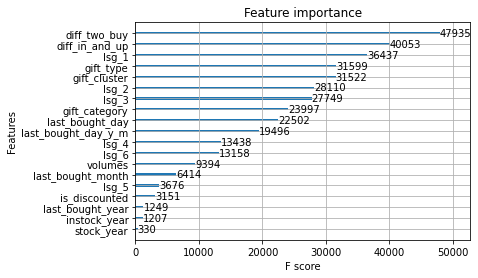

In [107]:
from xgboost import plot_importance
plot_importance(xgbr)

In [114]:
from sklearn.metrics import mean_absolute_error

In [130]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'gbdt',  
         'metric': 'mae',
         'learning_rate': 0.2, 
         'num_iterations': 100,
         'num_leaves': 60,
         'max_depth': 10,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_test)
print('RMSLE:', sqrt(mean_absolute_error(y_test, y_pred_lgbm)))


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's l1: 45.0205
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 45.0205
RMSLE: 6.709729478350066


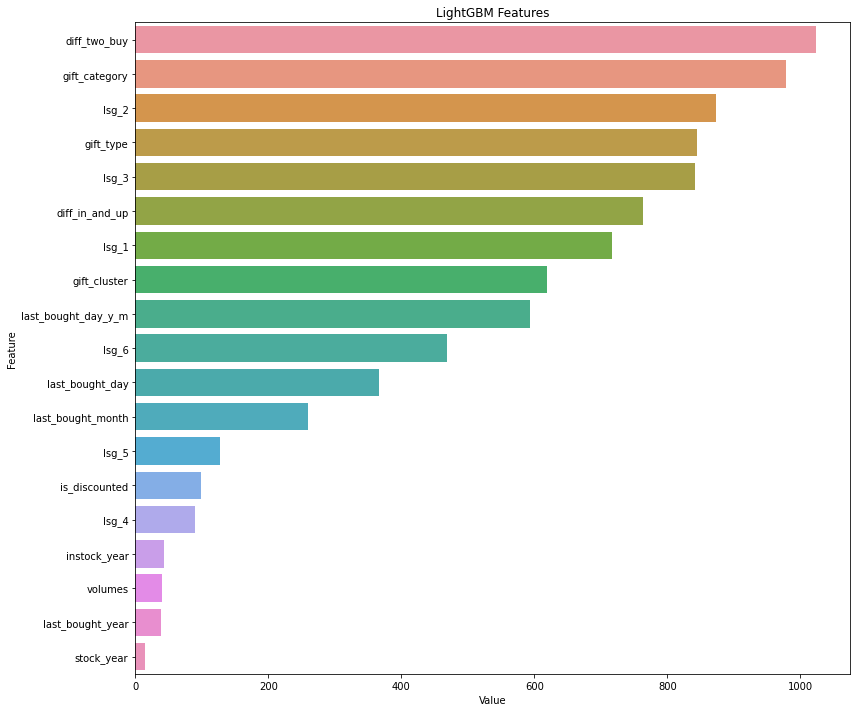

In [120]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [160]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=500, max_depth=31, learning_rate=0.1, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_absolute_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_absolute_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Datatest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  6.255579805633392
RMSLE LGBM:  6.322071917812661
RMSLE LGBM:  6.482652126814802
RMSLE LGBM:  6.063443226734685
RMSLE LGBM:  6.4472809862500675
RMSLE LGBM:  6.323644976649265
RMSLE LGBM:  6.196758759648217
RMSLE LGBM:  6.505189726880308
RMSLE LGBM:  6.373696761430638
RMSLE LGBM:  6.3703359334330365


In [138]:
y_pred_totlgb

[array([177.36748089, 123.83383369, 101.13645627, ..., 138.46642012,
         51.89612663,  71.80390653]),
 array([109.23037942, 198.2581928 ,  48.19541774, ...,  86.35633161,
         50.7504142 , 101.78498718]),
 array([151.71549472, 197.35258488,  14.69239027, ...,  55.06395105,
        135.11767684, 270.57722171]),
 array([108.43255359, 181.83932496, 209.67383891, ..., 379.50597614,
         66.0845874 ,  88.29897503]),
 array([ 95.63196861, 176.8781984 , 104.85781734, ..., 112.68545187,
        139.66457854, -22.42659913]),
 array([97.60701575, 93.30679612, 47.96948245, ..., 45.1877861 ,
        50.73407892, 34.99662846]),
 array([140.53207497, 113.58200253, 107.14700499, ...,  95.3117784 ,
         68.47898774,  99.86933093]),
 array([147.93569009,  -8.10010695, 144.74240986, ...,  56.10519908,
         70.35480787,  78.08124224]),
 array([112.9161    ,  62.47875791, 282.8467897 , ..., 166.24001057,
         81.09834061,  37.06049646]),
 array([ 55.51361774, 462.5935947 , 153.060

In [161]:
100-np.mean(errlgb,0)

93.6659345778713

In [162]:
y_pred_totlgb[0]

array([127.7288999 , 117.20287075,  40.52909957, ..., 302.82266415,
       386.47580961, 350.21265589])

In [152]:
lgbm_final.shape,y_pred_totlgb[0].shape

((2028,), (2028,))

In [163]:
lgbm_final=y_pred_totlgb[0]*0.6+y_pred_totlgb[1]*0.4

In [165]:
lgbm_final

array([105.31758109, 144.18808958,  38.75100331, ..., 393.30683168,
       405.97438968, 262.52362478])

In [155]:
lgbm_final.shape

(2028,)

In [164]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([105.31758109, 144.18808958,  38.75100331, ..., 393.30683168,
       405.97438968, 262.52362478])

In [170]:
print('RMSLE:', sqrt(mean_absolute_error(y_test,y_pred_lgbm)))

RMSLE: 6.3703359334330365


In [121]:
predns=lgbm.predict(Datatest)

In [86]:
pred=xgbr.predict(Datatest)

In [167]:
dataf=pd.DataFrame({
    'gift_id':dftest['gift_id'],
    'price':lgbm_final
})

In [168]:
dataf.to_csv('sub_gift.csv',index=False)